In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 

import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Создаем выборку для классификации
classify_problem = datasets.make_classification(n_samples=200, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)
colors = ListedColormap(['red', 'blue', 'yellow', 'pink'])

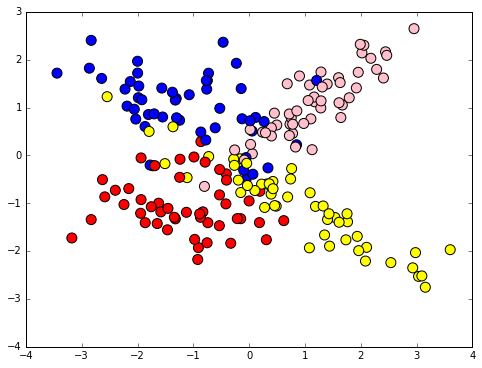

In [8]:
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightpink'])
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classify_problem[0])), list(map(lambda x: x[1], classify_problem[0])), 
              c=classify_problem[1], cmap=colors, s=100)

In [4]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [9]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [10]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classify_problem[0], 
                                                                                     classify_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

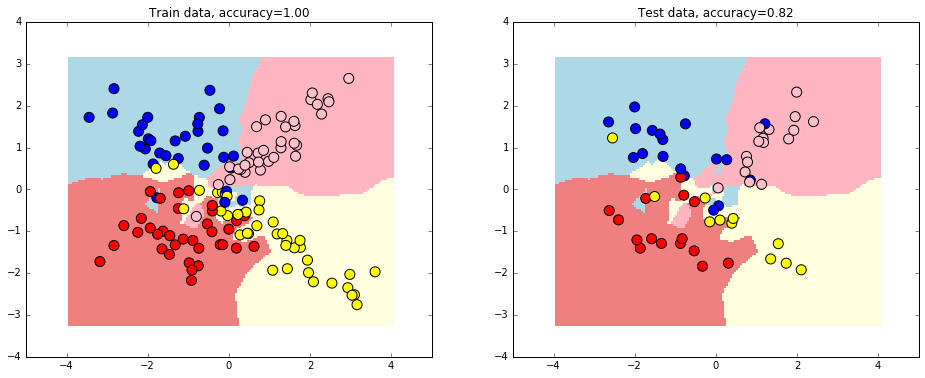

In [11]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

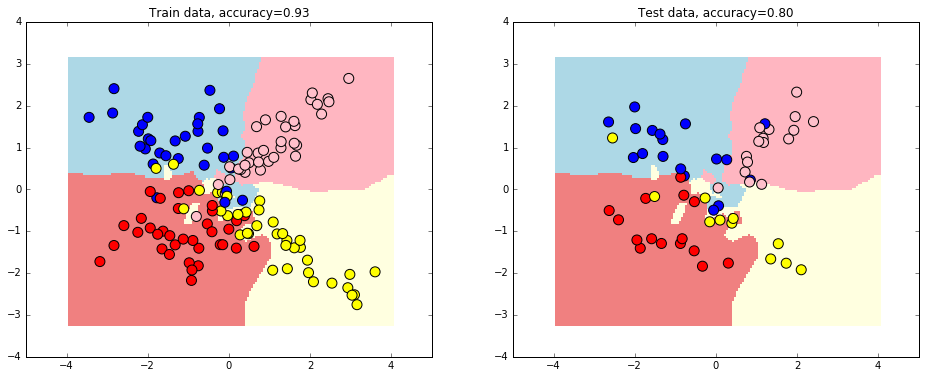

In [12]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

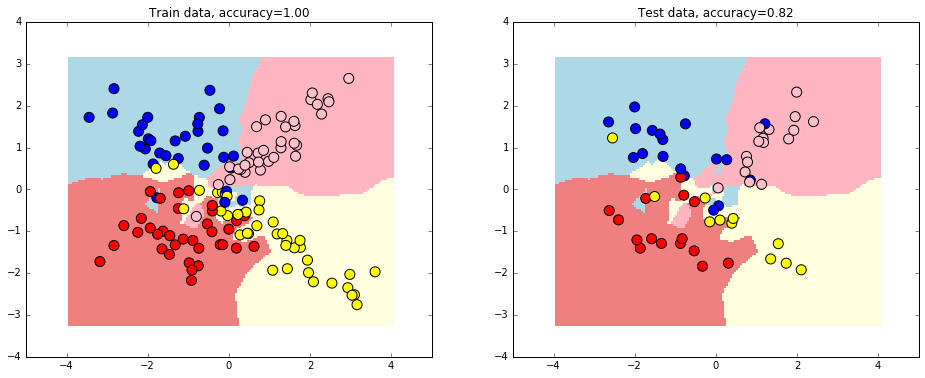

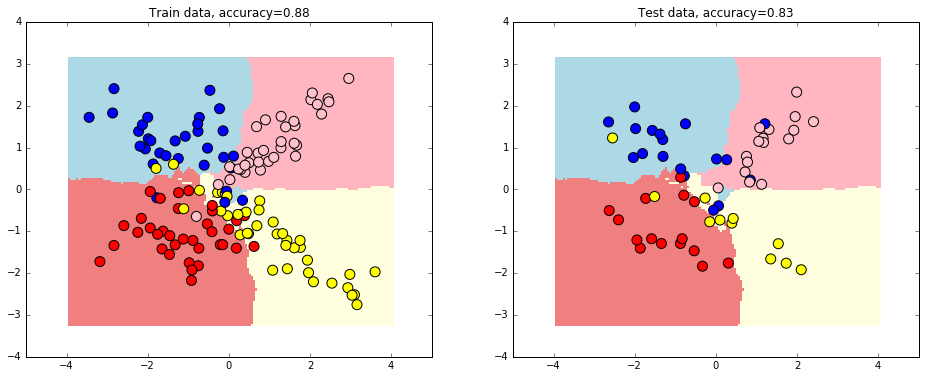

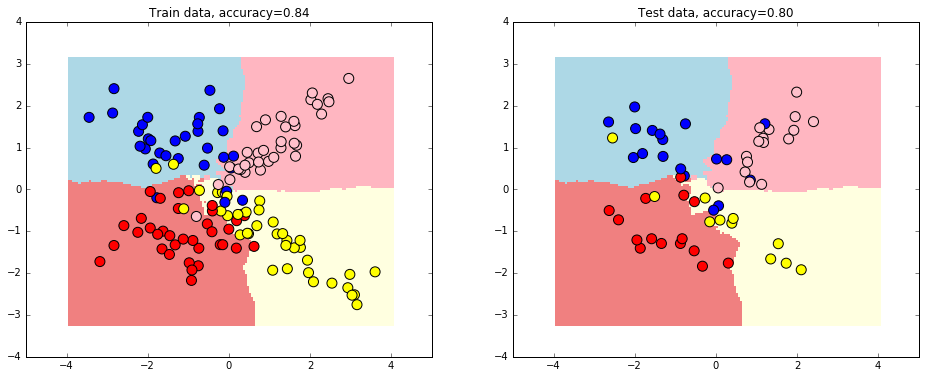

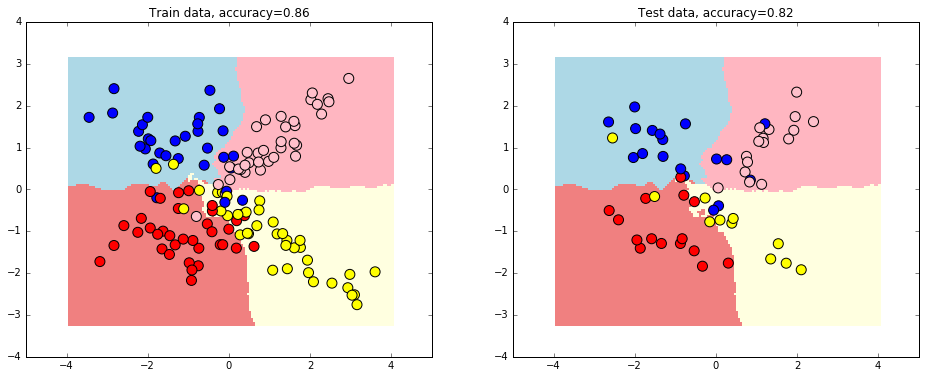

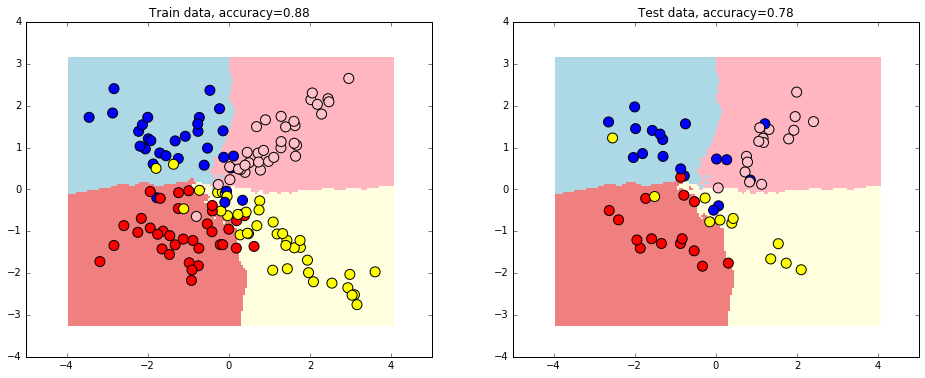

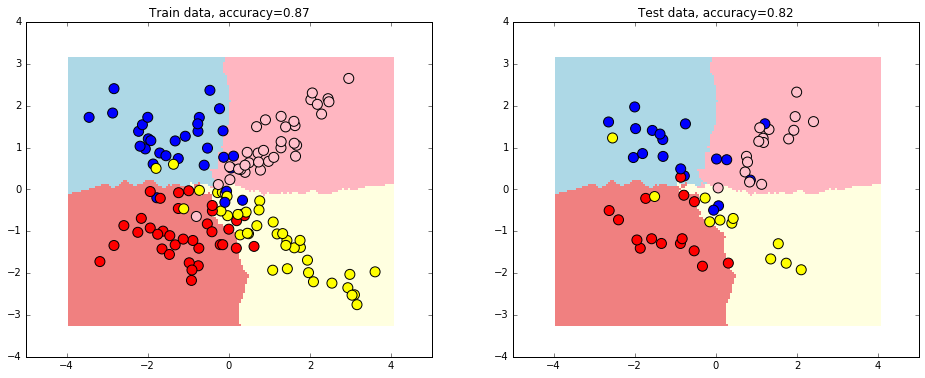

In [13]:
for i in range (1, 30, 5):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=i)
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [25]:
for train_indices, test_indices in cross_validation.KFold(200, n_folds = 5, shuffle = True):
    train_data = classify_problem[0][train_indices]
    train_labels = classify_problem[1][train_indices]
    test_data = classify_problem[0][test_indices]
    test_labels = classify_problem[1][test_indices]

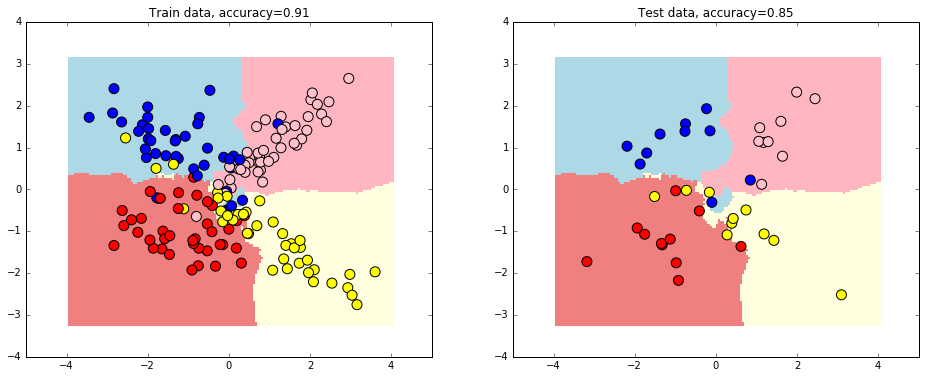

In [26]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=4)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

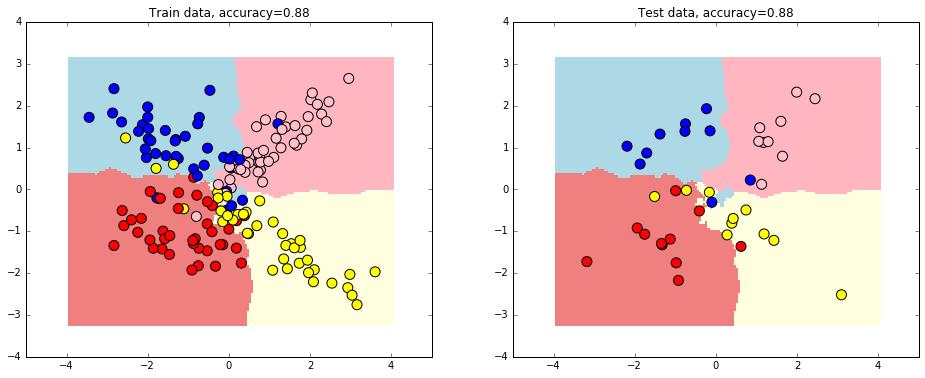

In [27]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

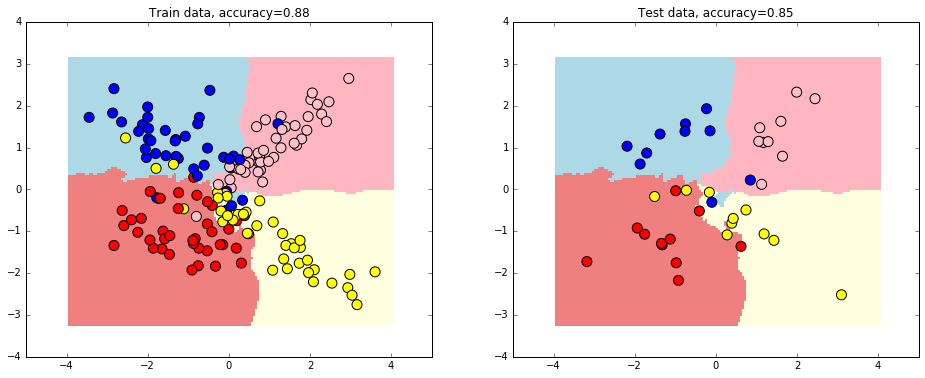

In [28]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=6)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

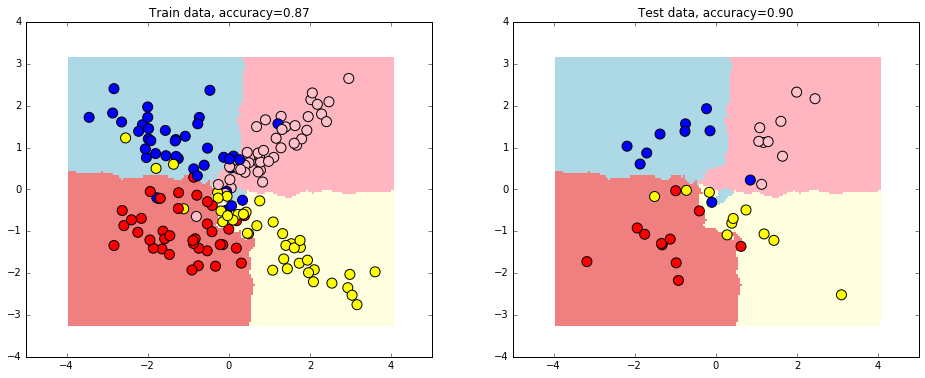

In [29]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=7)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

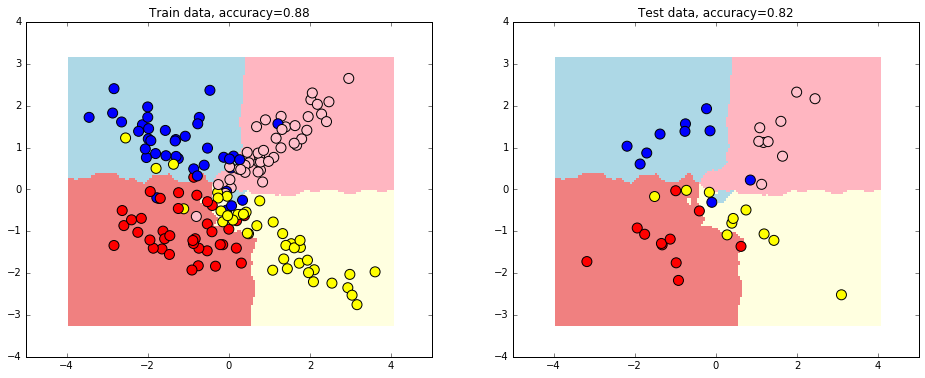

In [30]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=8)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [31]:
accuracy = []
x = np.arange(1, 60)
for i in x:
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_data, train_labels)
    predictions = clf.predict(test_data)
    accuracy.append(metrics.accuracy_score(test_labels, predictions))

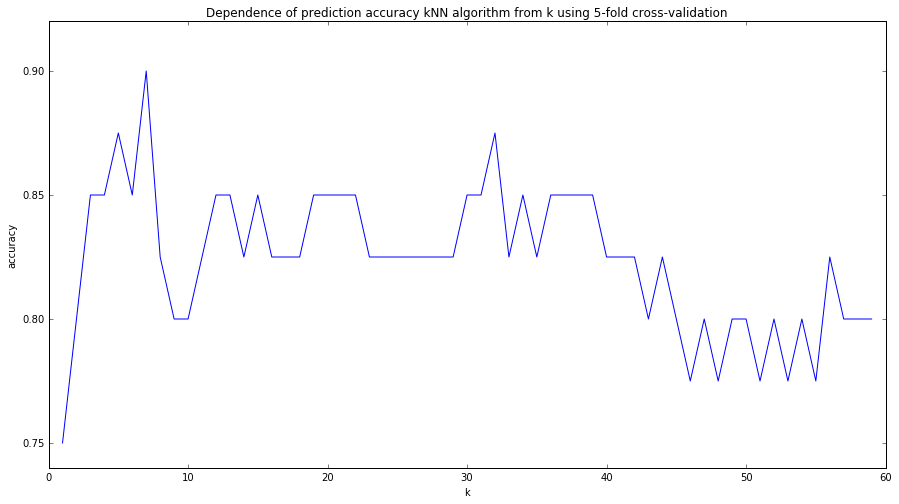

In [32]:
pyplot.figure(figsize=(15,8))
plt.title('Dependence of prediction accuracy kNN algorithm from k using 5-fold cross-validation')
plt.xlabel('k')
plt.ylabel('accuracy')
pyplot.plot(x, accuracy)
